<center>
    <h1>Learning Ridge Regression</h1>
</center>
   

---

**Drawing a sample from the given DGP and estimating Y**

,X,Y
,<dbl>,<dbl>
1,0.8568793,0.6665921
2,2.3347865,0.4694365
3,0.5326771,0.1031226
4,0.5323820,1.4449602
5,0.1515478,1.0974129
6,1.5810113,1.7944053


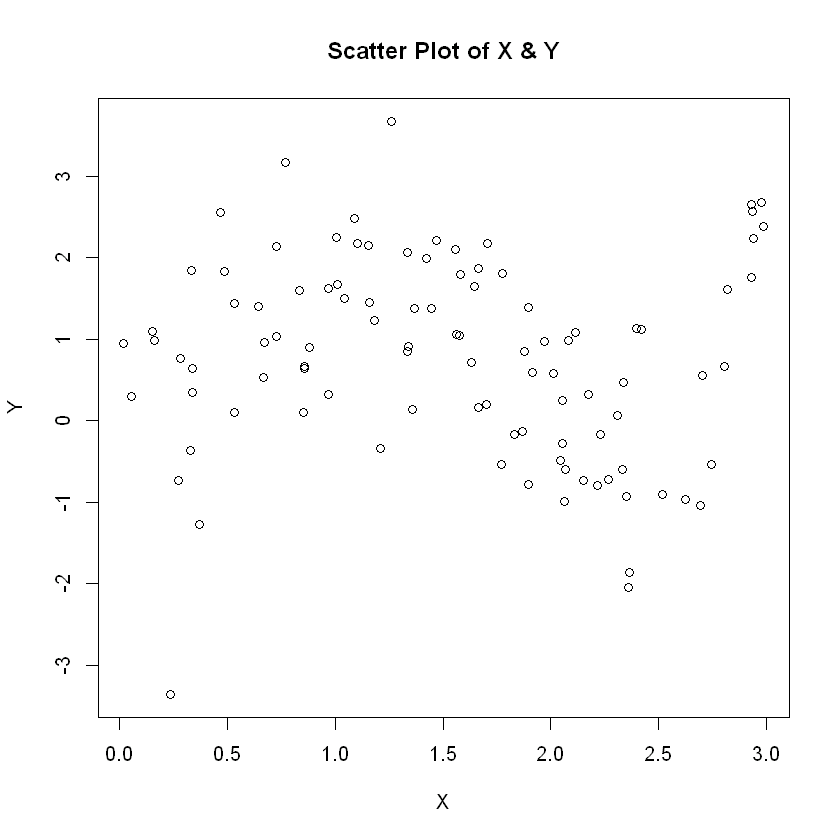

In [1]:
set.seed(325)
n <- 100
X <- runif(n, min = 0, max = 3)
epsilon<- rnorm(n, mean = 0, sd = 1)
Y <- 0.04 * X^6 - 0.45 * X^4 + 0.75 * X^2 + X + epsilon
head(data.frame(X, Y))

plot(X, Y, 
     main = "Scatter Plot of X & Y", 
     xlab = "X", 
     ylab = "Y")  

***Obtaining the value of beta using the Yi = Xiβ + ξi in the drawn sample***

In [2]:
ols_model <- lm(Y ~ 0 + X)# This fits the model Y_i = X_i * β + ξ_

In [3]:
beta_hat<-ols_model$coefficients

        X 
0.3647629 


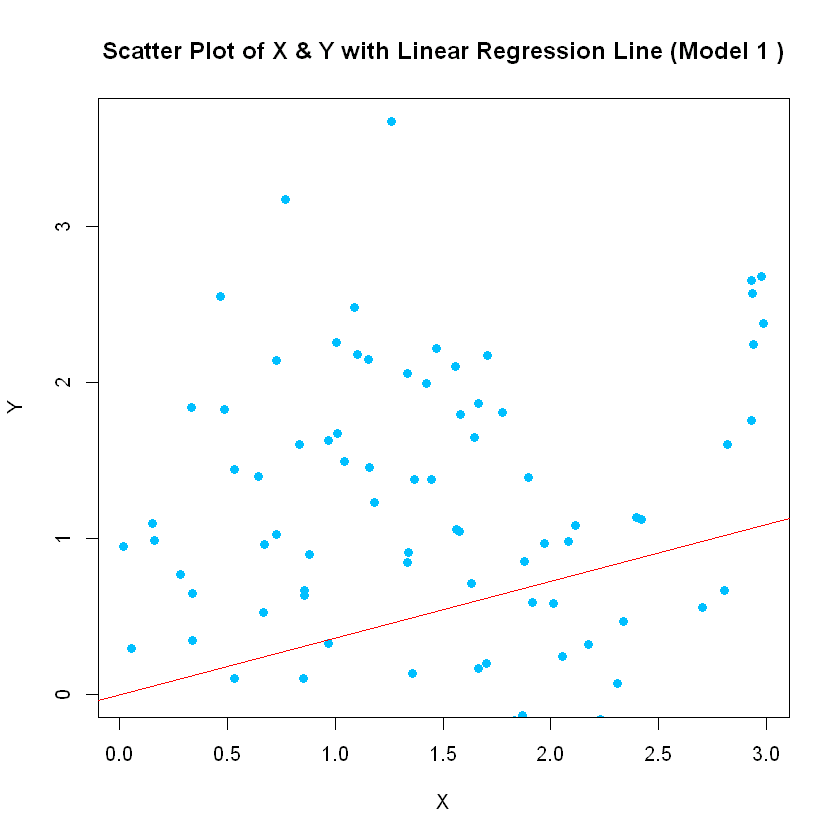

In [4]:
set.seed(123)
plot(X, Y, 
     main = "Scatter Plot of X & Y with Linear Regression Line (Model 1 )", 
     xlab = "X", 
     ylab = "Y", 
     pch = 19, 
     col = "deepskyblue", ylim = c(0, max(Y)))

# Add the fitted line based on the OLS model
abline(ols_model, col = "red")

# display the estimated coefficient
print(ols_model$coefficients)

***Using ˆ f^(r)(x) = xˆ β(r) predicting Y ^(r). when X=1***

In [5]:
Y_hat_r <- 1 * beta_hat 
print(paste("Predicted Y_hat when X = 1: ", Y_hat_r))

[1] "Predicted Y_hat when X = 1:  0.364762853997717"


***Repeating this for R=10^4 times and saving the predictions in a vector***

In [6]:
set.seed(123)
predictions <- rep(NA, 10^4)
for (r in 1:10^4) {
  n<-100
  X_i <- runif(n, min = 0, max = 3) 
  epsilon_i <- rnorm(n, mean = 0, sd = 1)  # ε_i from N(0, 1)
  Y_i <- 0.04 * X_i^6 - 0.45 * X_i^4 + 0.75 * X_i^2 + X_i + epsilon_i
  ols_model <- lm(Y_i ~ 0 + X_i)  # for Y=Xbeta+epsilon
  beta_hat <- coef(ols_model)
  predictions[r] <- 1 * beta_hat  # Store the new prediction for each iteration
}
predictions

[1]  0.2099776055  0.4026353032  0.1353641780  0.2163912634  0.2880572418
    [6]  0.4192405752  0.2607613028  0.1536303828  0.2221832573  0.2203524517
   [11]  0.2577313801  0.2509739850  0.3198427562  0.2057419591  0.3235556589
   [16]  0.2461351849  0.4586635947  0.1815055911  0.3247977029  0.3006259217
   [21]  0.1752968387  0.3968559564  0.1745469884  0.2966318828  0.1542109067
   [26]  0.2754319021  0.2123401459  0.2345241969  0.2577632072  0.2987941662
   [31]  0.2424721183  0.1512092373  0.2103560754  0.2090276208  0.3585599244
   [36]  0.2727068187  0.2079518901  0.1920082905  0.2029342435  0.3451021087
   [41]  0.2243142978  0.2459323811  0.3262640209  0.2602390587  0.2268527467
   [46]  0.3188714262  0.3021472867  0.2922496156  0.2951594683  0.3285762312
   [51]  0.2321075598  0.2058620749  0.2398603879  0.1154603711  0.2029635872
   [56]  0.2741467353  0.2568627234  0.2201679046  0.3214824306  0.0078430674
   [61]  0.1473133648  0.3746517033  0.3260142888  0.2610686819  0.2440536186
   [66]  0.1634697017  0.4127160990  0.2560170126  0.2356186833  0.2473533971
   [71]  0.1675212246  0.1439815975  0.2204115473  0.2322717894  0.1929667492
   [76]  0.2637447496  0.2321858470  0.1945851507  0.3257946165  0.2840941065
   [81]  0.1472756688  0.2429096960  0.0598526970  0.2725304474  0.2612456778
   [86]  0.1300246052  0.1990197756  0.2686674846  0.2300147315  0.3025323415
   [91]  0.2224705564  0.2867782178  0.3549570593  0.4025408914  0.1752321340
   [96]  0.3392909755  0.2656036461  0.1332540741  0.3053519439  0.2957132008
  [101]  0.2034193873  0.3073425912  0.1957398006  0.3320214592  0.2916201962
  [106]  0.3574653997  0.3081677920  0.2810370718  0.0485059419  0.3710606202
  [111]  0.3338161700  0.1723224443  0.1959807431  0.3486849083  0.2834798393
  [116]  0.1717768650  0.2014397381  0.2778433163  0.3399242006  0.3415885668
  [121]  0.3218676319  0.1759382347  0.3165371059  0.2209493430  0.0316762216
  [126]  0.3652449135  0.1696728923  0.2857098129  0.3024342548  0.2743419353
  [131]  0.2973648983  0.3133728230  0.2120381908  0.2808712278  0.0658662158
  [136]  0.4444552134  0.1612582901  0.1534425219  0.2542801836  0.1646685029
  [141]  0.2993355037  0.1920426853  0.3695032188  0.1794839543  0.3933086710
  [146]  0.3706787797  0.2133949718  0.1472275832  0.3525000046  0.2837148382
  [151]  0.2380272802  0.1704259487  0.1821571082  0.1350119152  0.3915495240
  [156]  0.2918173006  0.2375735842  0.2266611809  0.2322497270  0.2131127291
  [161]  0.2164107179  0.1628462381  0.2425763234  0.1456103377  0.2550115376
  [166]  0.2224513827  0.3560734737  0.2733392997  0.3201578177  0.2567866343
  [171]  0.1478108782  0.3222609748  0.1679110487  0.2370882227  0.0821022097
  [176]  0.1408594139  0.1251327800  0.1523490600  0.1199197920  0.2461666683
  [181]  0.2686402513  0.2041216719  0.2446779623  0.3439420298  0.2525895123
  [186]  0.3201370245  0.2579678757  0.3229146024  0.3627779055  0.2690395164
  [191]  0.3428137400  0.1515559213  0.2721950929  0.2180799990  0.3129063088
  [196]  0.4164507763  0.3271622266  0.3036265230  0.3092879182  0.3385212646
  [201]  0.3901391592  0.1179515160  0.3449062781  0.3204468603  0.2108513298
  [206]  0.3244864251  0.1414557588  0.3457483552  0.2221403404  0.2653564161
  [211]  0.3388438238  0.4025159823  0.2099596287  0.2360981902  0.3782630513
  [216]  0.2187022552  0.3009224296  0.3141476167  0.1760957100  0.3204017724
  [221]  0.2916042521  0.3749522943  0.3526000693  0.1831795208  0.2161708401
  [226]  0.4049795464  0.3723088862  0.1867091418  0.3307184808  0.3223778013
  [231]  0.2096412966  0.1776534664  0.2732730253  0.2983475580  0.2451782891
  [236]  0.1730827858  0.2739490576  0.2908893878  0.1741645652  0.2883527354
  [241]  0.1785747414  0.3395590965  0.2594068758  0.2962643397  0.0664941937
  [246]  0.2544172099  0.3129312241  0.2443035098  0.3067172462  0.3543199433
  [251]  0.2382434208  0.2178087739  0.2461964321  0.2755414064  0.1935887005
  [256]  0.2992224235  0.2

***Question c(1)& c(2): Computing the Squared Bias and Variance at X=1***4
!2***

In [7]:
mean_prediction <-mean(predictions)
squared_bias<-(mean_prediction-1.34)^2
cat("mean prediction is",mean_prediction)/n
cat("Squared bias is",squared_bias)

mean prediction is 0.2590015

numeric(0)

Squared bias is 1.168558

In [8]:
variance_prediction <-mean((predictions-mean_prediction)^2)
cat(variance_prediction)

0.006107927

***Question c(3): plot a histogram of your predictions { ˆ Y (r)
i }Rr=1, and indicate the value of themean prediction, R−1PRr=1ˆ Y (r), and the optimal prediction, 1.34***

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


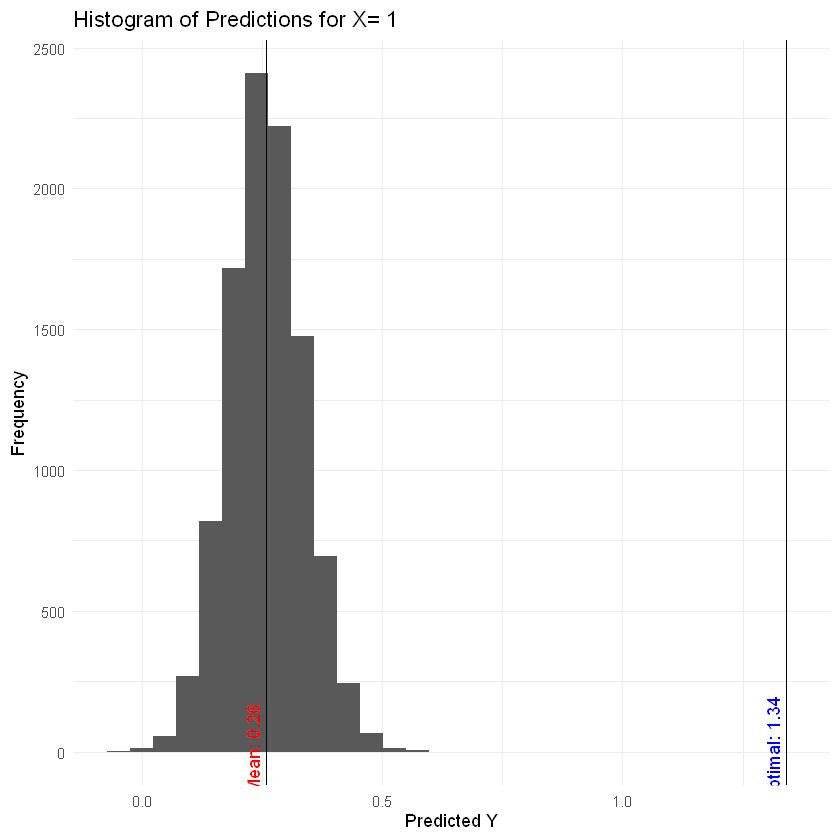

In [9]:
library(ggplot2)
mean_prediction <- mean(predictions)
ggplot(data = data.frame(predictions), aes(x = predictions)) +
  geom_histogram() +
  geom_vline(aes(xintercept = mean_prediction)) +
  geom_vline(aes(xintercept = 1.34)) +
  labs(title = "Histogram of Predictions for X= 1",
       x = "Predicted Y",
       y = "Frequency") +
  annotate("text", x = mean_prediction, y = 10, label = paste("Mean:", round(mean_prediction, 2)), color = "red", angle = 90, vjust = -0.5) +
  annotate("text", x = 1.34, y = 10, label = "Optimal: 1.34", color = "blue", angle = 90, vjust = -0.5)+theme_minimal()

---

***Question c(4): plot a histogram of your predictions for revised function
i }Rr=1, and indicate the value of themean prediction, R−1PRr=1ˆ Y (r), and the optimal prediction, 1.34***

In [10]:
library(ggplot2)
set.seed(123)
R <- 10^4 
predictions2 <- rep(NA, R)
for (r in 1:R) {
  n <- 100
  X_i <- runif(n, min = 0, max = 3)
  epsilon_i <- rnorm(n, mean = 0, sd = 1)
  Y_i <- 0.04 * X_i^6 - 0.45 * X_i^4 + 0.75 * X_i^2 + X_i + epsilon_i
  ols_model2<- lm(Y_i ~ 0 + X_i + I(X_i^2) + I(X_i^4) + I(X_i^6)) 
  beta_1 <- coef(ols_model)[1]  # Coefficient for X_i
  beta_2 <- coef(ols_model)[2]  # Coefficient for X_i^2
  beta_3 <- coef(ols_model)[3]  # Coefficient for X_i^4
  beta_4 <- coef(ols_model)[4]  # Coefficient for X_i^6
  
  predictions2[r] <- beta_1 + beta_2 * 1^2 + beta_3 * 1^4 + beta_4 * 1^6  # For X_i = 1
}
mean_prediction2 <-mean(predictions2)
cat(mean_prediction2)

1.340079

        X_i    I(X_i^2)    I(X_i^4)    I(X_i^6) 
 1.65260415  0.25388176 -0.40460182  0.03757689 


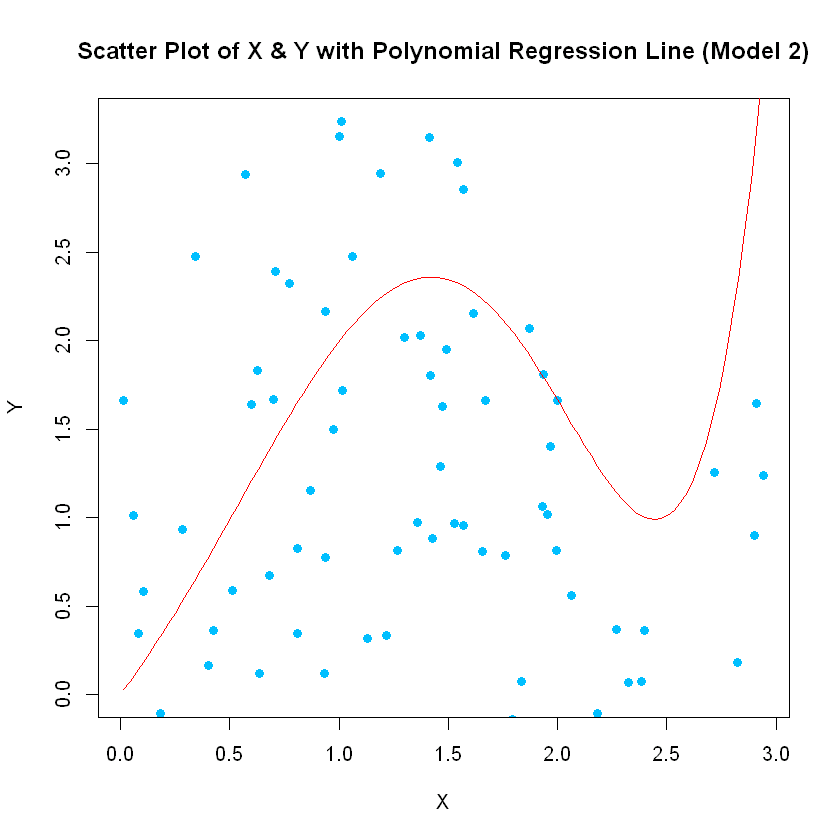

In [11]:
plot(X_i, Y_i, 
     main = "Scatter Plot of X & Y with Polynomial Regression Line (Model 2)", 
     xlab = "X", 
     ylab = "Y", 
     ylim = c(0, max(Y_i)),
     pch = 19, 
     col = "deepskyblue")

curve(0.04 * x^6 - 0.45 * x^4 + 0.75 * x^2 + coef(ols_model)[1] * x, 
      add = TRUE, col = "red")

print(coef(ols_model))

In [12]:
mean_prediction2 <-mean(predictions2)
squared_bias<-(mean_prediction2-1.34)^2
cat("mean prediction is",mean_prediction2)/n
cat("Squared bias is",squared_bias)

mean prediction is 1.340079

numeric(0)

Squared bias is 6.19048e-09

In [13]:
variance_prediction2 <-mean((predictions2-mean_prediction2)^2)
cat(variance_prediction2)

0.02770197

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


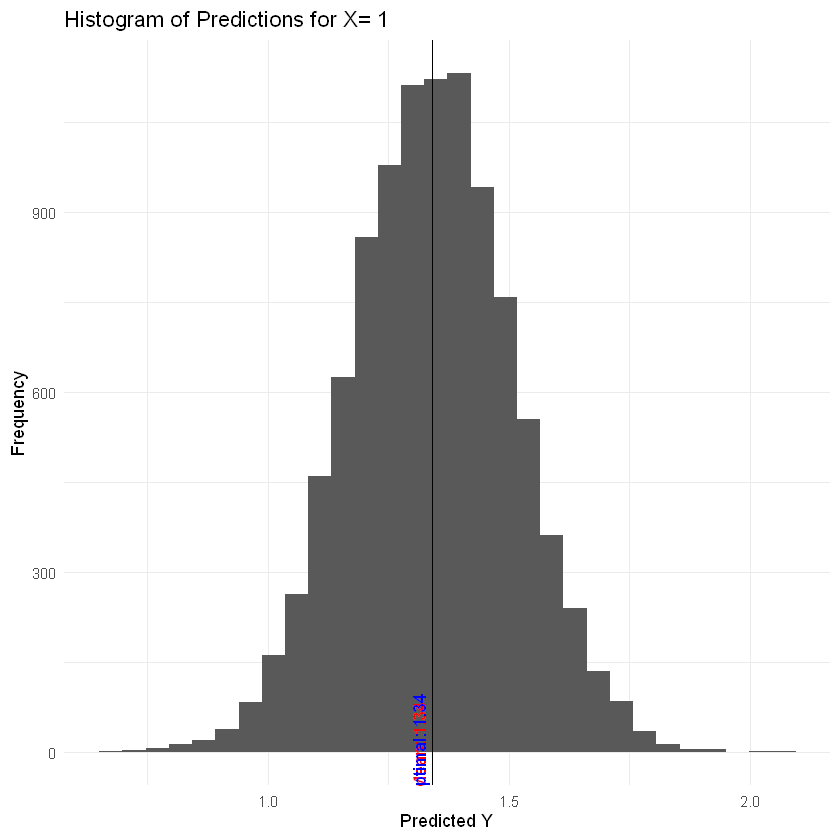

In [14]:
library(ggplot2)
mean_prediction <- mean(predictions2)
ggplot(data = data.frame(predictions2), aes(x = predictions2)) +
  geom_histogram() +
  geom_vline(aes(xintercept = mean_prediction2)) +
  geom_vline(aes(xintercept = 1.34)) +
  labs(title = "Histogram of Predictions for X= 1",
       x = "Predicted Y",
       y = "Frequency") +
  annotate("text", x = mean_prediction2, y = 10, label = paste("Mean:", round(mean_prediction2, 2)), color = "red", angle = 90, vjust = -0.5) +
  annotate("text", x = 1.34, y = 10, label = "Optimal: 1.34", color = "blue", angle = 90, vjust = -0.5)+theme_minimal()